# Daily Energy

The most basic piece of information is the daily energy use from each microgrid.  The meter provides a kWh export field that we can sample on a daily basis to get this information.  Visually, the energy appears to be about 25 kWh per day for this site (Atamali).



In [1]:
import pandas as pd
import os as os
import xlrd
import datetime
import matplotlib as plt
import numpy as np
%matplotlib inline

# read in raw CSV file for preprocessing
atamali_file = open("../data-timeseries/Data_Logs Atamali Agustus.csv")

# dump lines from communications messages or empty lines and write to string
file_string = ''
omit_strings = ['Power Up', 'Communication Lost', 'Power Down', ',,,,,,,,,,,']
# there is information in the first 32 lines being dumped
for line in atamali_file.readlines()[32:]:
    if not any(omit in line for omit in omit_strings):
        file_string += line

# use pre-parsed string to read in data file to pandas and sort by date
import io
atamali = pd.read_csv(io.StringIO(file_string),
                      index_col=0, 
                      parse_dates=[0], 
                      thousands=',')
atamali = atamali.sort_index()

This is the raw data as stored by the meter.  You can observe the stairstep from when the meter is running.  The flat parts are the portions without data where we assume the grid isn't operating.

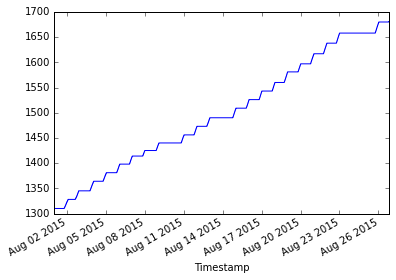

In [2]:
atamali['kWh export'].plot()

We can resample this at a daily frequency to smooth out the variations.

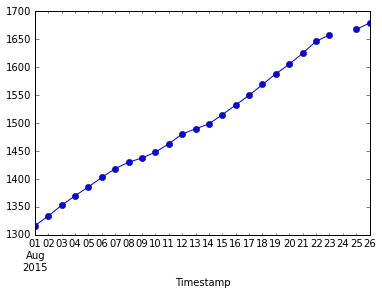

In [3]:
energy = atamali['kWh export']
energy.resample('D').plot(marker='o')

We can also take the difference of this and we get the daily energy use as reported by the export field from the meter.

This looks like a daily energy of about 16 - 20 kWh per day with other days where the grid isn't available.

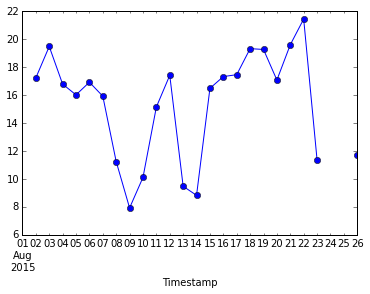

In [4]:
energy.resample('D').diff().plot(marker='o')